<a href="https://colab.research.google.com/github/schauppi/Udemy_TensorFlow_Developer/blob/main/Exam_preparation/nlp_yelp_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yelp Reviews sentiment analysis

In [1]:
#Download dataset
!wget https://raw.githubusercontent.com/schauppi/Udemy_TensorFlow_Developer/main/Exam_preparation/Datasets/yelp.csv

--2021-09-06 13:28:27--  https://raw.githubusercontent.com/schauppi/Udemy_TensorFlow_Developer/main/Exam_preparation/Datasets/yelp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8091185 (7.7M) [text/plain]
Saving to: ‘yelp.csv’

yelp.csv            100%[===================>]   7.72M  --.-KB/s    in 0.1s    

2021-09-06 13:28:28 (72.3 MB/s) - ‘yelp.csv’ saved [8091185/8091185]



In [2]:
# Turn csv into pandas DataFrame
import pandas as pd
import numpy as np
import tensorflow as tf
df = pd.read_csv("/content/yelp.csv")
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [195]:
#Shuffle the dataframe
df_shuffled = df.sample(frac=1, random_state=42)
df_shuffled.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
6252,QVR7dsvBeg8xFt9B-vd1BA,2010-07-22,hwYVJs8Ko4PMjI19QcR57g,4,We got here around midnight last Friday... the...,review,90a6z--_CUrl84aCzZyPsg,5,5,2
4684,24qSrF_XOrvaHDBy-gLIQg,2012-01-22,0mvthYPKb2ZmKhCADiKSmQ,5,Brought a friend from Louisiana here. She say...,review,9lJAj_2zCvP2jcEiRjF9oA,0,0,0
1731,j0Uc-GuOe-x9_N_IK1KPpA,2009-05-09,XJHknNIecha6h0wkBSZB4w,3,"Every friday, my dad and I eat here. We order ...",review,0VfJi9Au0rVFVnPKcJpt3Q,0,0,0
4742,RBiiGw8c7j-0a8nk35JO3w,2010-12-22,z6y3GRpYDqTznVe-0dn--Q,1,"My husband and I were really, really disappoin...",review,lwppVF0Yqkuwt-xaEuugqw,2,2,2
4521,U8VA-RW6LYOhxR-Ygi6eDw,2011-01-17,vhWHdemMvsqVNv5zi2OMiA,5,Love this place! Was in phoenix 3 weeks for w...,review,Y2R_tlSk4lTHiLXTDsn1rg,0,1,0


In [196]:
#How many different ratings
df_shuffled.stars.value_counts()

4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64

In [197]:
#Create new star rating - if stars == 1 or 2 then 1, 3 = 2, 4 and 5 = 3
stars_aggregated = []
for row in df_shuffled["stars"]:
  if row == 1 or row == 2:
    stars_aggregated.append(1)
  elif row == 3:
    stars_aggregated.append(2)
  elif row == 4 or row ==5:
    stars_aggregated.append(3)

In [198]:
len(stars_aggregated)

10000

In [217]:
#How many different ratings
df_shuffled.stars_aggregated.value_counts()

3    6863
1    1676
2    1461
Name: stars_aggregated, dtype: int64

In [199]:
df_shuffled["stars_aggregated"] = stars_aggregated

In [200]:
df_shuffled.head(5)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,stars_aggregated
6252,QVR7dsvBeg8xFt9B-vd1BA,2010-07-22,hwYVJs8Ko4PMjI19QcR57g,4,We got here around midnight last Friday... the...,review,90a6z--_CUrl84aCzZyPsg,5,5,2,3
4684,24qSrF_XOrvaHDBy-gLIQg,2012-01-22,0mvthYPKb2ZmKhCADiKSmQ,5,Brought a friend from Louisiana here. She say...,review,9lJAj_2zCvP2jcEiRjF9oA,0,0,0,3
1731,j0Uc-GuOe-x9_N_IK1KPpA,2009-05-09,XJHknNIecha6h0wkBSZB4w,3,"Every friday, my dad and I eat here. We order ...",review,0VfJi9Au0rVFVnPKcJpt3Q,0,0,0,2
4742,RBiiGw8c7j-0a8nk35JO3w,2010-12-22,z6y3GRpYDqTznVe-0dn--Q,1,"My husband and I were really, really disappoin...",review,lwppVF0Yqkuwt-xaEuugqw,2,2,2,1
4521,U8VA-RW6LYOhxR-Ygi6eDw,2011-01-17,vhWHdemMvsqVNv5zi2OMiA,5,Love this place! Was in phoenix 3 weeks for w...,review,Y2R_tlSk4lTHiLXTDsn1rg,0,1,0,3


In [201]:
#get info about the dataframe
df_shuffled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 6252 to 7270
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   business_id       10000 non-null  object
 1   date              10000 non-null  object
 2   review_id         10000 non-null  object
 3   stars             10000 non-null  int64 
 4   text              10000 non-null  object
 5   type              10000 non-null  object
 6   user_id           10000 non-null  object
 7   cool              10000 non-null  int64 
 8   useful            10000 non-null  int64 
 9   funny             10000 non-null  int64 
 10  stars_aggregated  10000 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 937.5+ KB


In [218]:
#Visualize some random examples
import random
random_index = random.randint(0, len(df_shuffled)-5)
for row in df_shuffled[["text", "stars_aggregated"]][random_index:random_index+5].itertuples():
  _, text, stars = row
  print(f"Text: {text}")
  print(f"Rating: {stars}\n")

Text: Kindred Spirits has closed their doors. It is a sad thing that we on the west side of Phoenix cannot support such a friendly and community oriented business, AND one that gave you the option to drop by for a quick coffee or for a more complete dining experience. The live music on the weekends was also something a bit rare for our side of town, and will be missed. Richard and Debra did a marvelous job updating the space, and making it a warm and welcoming place. I am sorry that Youngtown has lost this business.
Rating: 3

Text: Stopped by here for lunch today... I saw the Burger sign outside and thought I would try it out. WOW!! This place is amazing. The owner/chef was taking the orders and was super helpful and friendly. I had a Paradise CHZ which came with 2 patties, smoked mozzarella lettuce, tomato, caramelized onion as well as cucumber. I also ordered  Sweet Potato Tater Tots I was blown away! BEST BURGERS IN PHOENIX!  Our bill came to $18 for 2 cheese burgers, 2 sides and a

In [214]:
np.random.seed(42)
perm = np.random.permutation(df_shuffled.index)
m = len(df_shuffled)
train_end = int(0.6 * m)
validate_end = int(0.2 * m) + train_end
train = df_shuffled.iloc[perm[:train_end]]
validate = df_shuffled.iloc[perm[train_end:validate_end]]
test = df_shuffled.iloc[perm[validate_end:]]

In [215]:
len(train), len(validate), len(test)

(6000, 2000, 2000)

In [216]:
#Turn dataframes into numpy arrays
train_sentences = train["text"].to_numpy()
train_labels = train["stars_aggregated"].to_numpy()
val_sentences = validate["text"].to_numpy()
val_labels = validate["stars_aggregated"].to_numpy()
test_sentences = test["text"].to_numpy()
test_labels = test["stars_aggregated"].to_numpy()
train_sentences.shape, val_sentences.shape, test_sentences.shape

((6000,), (2000,), (2000,))

In [219]:
#One hot encode labels
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_labels.reshape(-1, 1))
test_labels_one_hot = one_hot_encoder.fit_transform(test_labels.reshape(-1, 1))
val_labels_one_hot = one_hot_encoder.fit_transform(val_labels.reshape(-1, 1))

In [220]:
train_labels_one_hot

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [223]:
z = random.randint(0, 6000)
print(train_labels_one_hot[z])
print(train_labels[z])

[0. 1. 0.]
2


In [225]:
train_sentences[:5], test_sentences[:5], val_sentences[:5]

(array(["Was at Zinc again last night and have to say the place keeps getting better still.  Started with the crepes again, perfect again.  Then shared the scallops and lamb shank for dinner.  I'm not usually a huge fan of lamb OR scallops but they were recommended and I was feeling adventurous.  The lamb -  AMAZING.  Melt in your mouth wonderful.  More like a stew than anything with classic fall off the bone tender meat over creamy cheesy polenta.  Their bread is perfect French bread too.  This time of year (winter) there is a festive, buzzy energy with a good crowd but not TOO long of a wait.  Make reservations though for sure.  Oh, and Bobby's across the way in Kierland is a nice spot for a pre-dinner drink (400s Hollywood glamour meets The Jetsons with cool live jazz your parents or grandparents would have enjoyed back in the day).",
        'Am ashamed to say I have filled up my punch card, twice.  Usually get the Hook and Ladder.  But the main reason I keep going back...the magic

In [60]:
train_labels[:5], test_labels[:5]

(array([3, 1, 4, 5, 5]), array([4, 4, 1, 1, 3]))

In [61]:
#Turn data into TensorFlwo Datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
val_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))

In [62]:
#Prefetch dataset 
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

## Create Text Vectorization layer

In [121]:
#find average number of words in training sentences
sent_lens = [len(sentence.split()) for sentence in train_sentences]
avg_sent_len = np.mean(sent_lens)
avg_sent_len

129.89166666666668

(array([3873., 1522.,  423.,  116.,   35.,   21.,   10.]),
 array([  1.        , 135.85714286, 270.71428571, 405.57142857,
        540.42857143, 675.28571429, 810.14285714, 945.        ]),
 <a list of 7 Patch objects>)

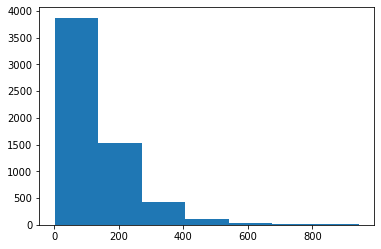

In [64]:
import matplotlib.pyplot as plt
plt.hist(sent_lens, bins=7)

In [65]:
# How long of a sentence covers 95% of the lengths?
output_seq_len = int(np.percentile(sent_lens, 95))
output_seq_len

352

In [128]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

max_vocab_length = 10000
max_length = 200

#Use default variables
text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [129]:
#Fit vectorizer to train sentences
text_vectorizer.adapt(train_sentences)

In [130]:
#Test vectorizer on random samples
random_sentence = random.choice(train_sentences)
print(f"Original text: \n{random_sentence}\
\n\nVectorized version:")
text_vectorizer([random_sentence])

Original text: 
Upper Crust is like Grimaldi's on steroids. The two places have nearly identical decor and the pizza is extremely similar. Upper Crust uses a little more cheese which is nice, but they also use cornmeal on the crust which I am not crazy about. The wings are huge and delicious, especially with the honey BBQ sauce. The meatballs are nothing special (with or without the mozzarella cheese), but Stephanie H would disagree. Happy hour is Monday-Friday 4pm to 7pm and on Wednesdays they offer half off on bottles of wine. 

Overall, it is a very good pizza and I plan on returning. Next time I'll be giving that pizza cookie a try. I really liked Upper Crust, but Grimaldi's in Old Town is still my favorite for traditional NY style thin crust pizza.

Vectorized version:


<tf.Tensor: shape=(1, 200), dtype=int64, numpy=
array([[2502,  612,    9,   36, 3203,   19,    1,    2,  133,  244,   22,
        1070, 6754,  419,    3,    2,  127,    9,  554, 1222, 2502,  612,
        2780,    4,   77,   67,  123,   63,    9,   78,   16,   20,   72,
         376, 9729,   19,    2,  612,   63,    5,  108,   23,  912,   56,
           2,  597,   25,  246,    3,  130,  400,   15,    2, 1044,  467,
         154,    2, 2242,   25,  258,  265,   15,   46,  306,    2, 1224,
         123,   16,    1, 3340,   58, 4699,  149,  188,    9,    1, 4195,
           6, 3727,    3,   19, 3578,   20,  475,  327,  126,   19, 1405,
           7,  211,  322,   10,    9,    4,   43,   26,  127,    3,    5,
         940,   19, 1298,  162,   50,  280,   32,  782,   13,  127, 1134,
           4,   98,    5,   55,  390, 2502,  612,   16, 3203,   12,  255,
         292,    9,  140,   14,  197,   11, 1056, 1395,  418,  777,  612,
         127,    0,    0,    0,    0,    0,    0,    0,    0,   

In [69]:
#Check unique tokens in vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
print(f"Number of words in vocab: {len(words_in_vocab)}")

Number of words in vocab: 10000


## Create Embedding layer

In [70]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             embeddings_initializer="uniform",
                             input_length=max_length)

In [71]:
# Test Embedding layer on random samples
random_sentence = random.choice(train_sentences)
print(f"Original text: \n{random_sentence}\
\n\nEmbedded version:")
embedding(text_vectorizer([random_sentence]))

Original text: 
I wrote a less than stellar review about this place some time ago and decided that my prior awful experience might have been a fluke and as I love great BBQ, decided to give them another go .....  I was right the first time!

As before, the food was ho-hum at best, the prices too high vs the product quality but the death blow to me was once again, their customer service or shall I say lack of customer service?

We had to ask the bartender if we could get a drink (That's odd) and all the wait staff acted like they were doing us a favor by waiting on us.

To top it all off, they had little to no air conditioning so it was brutal to sit through a combination of bad food, crummy service and high heat!!!

For me, this place is officially off the books and we sure won't be back. Lesson # 1: "Your in the service industry, try and acy like it"

As a BBQ fan, I'll try elsewhere ...............

Embedded version:


<tf.Tensor: shape=(1, 347, 128), dtype=float32, numpy=
array([[[-0.04692311,  0.03688704,  0.03419974, ..., -0.01339313,
         -0.02113156,  0.03712262],
        [-0.00368843,  0.03692389,  0.03669659, ..., -0.03648822,
         -0.01609354, -0.04189051],
        [-0.01889203, -0.01174212,  0.00214241, ..., -0.02437687,
          0.04896649, -0.03523253],
        ...,
        [ 0.00661311,  0.00503385,  0.01214869, ...,  0.00058261,
          0.0183217 ,  0.00627559],
        [ 0.00661311,  0.00503385,  0.01214869, ...,  0.00058261,
          0.0183217 ,  0.00627559],
        [ 0.00661311,  0.00503385,  0.01214869, ...,  0.00058261,
          0.0183217 ,  0.00627559]]], dtype=float32)>

## Modelling experiments

In [72]:
# Evaluation function

from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

### Model 1: Dense

In [73]:
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(5, activation="softmax")(x)
model_1 = tf.keras.Model(inputs, outputs)

In [74]:
model_1.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [75]:
history_model_1 = model_1.fit(train_dataset,
                              epochs=500,
                              verbose=0,
                              validation_data=val_dataset,
                              callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5, verbose=0),
                                         tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)])

In [140]:
def plot_training_curve(history):
  plt.figure(figsize=(10,7))
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  plt.plot(loss, label="loss")
  plt.plot(val_loss, label="val_loss")
  plt.plot(accuracy, label="accuracy")
  plt.plot(val_accuracy, label="val_accuracy")
  plt.legend()
  plt.title("Training curve")

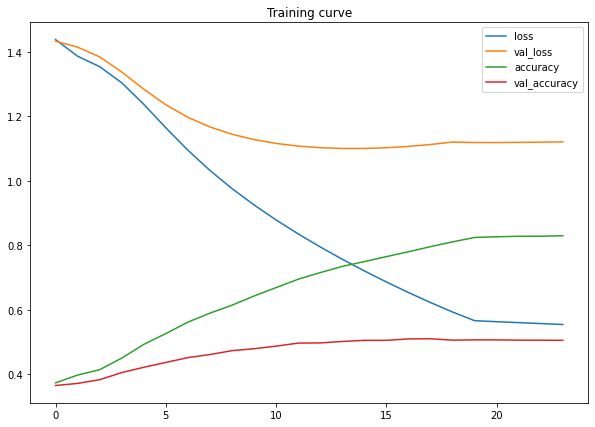

In [141]:
plot_training_curve(history_model_1)

In [77]:
#Evaluate
model_1.evaluate(test_dataset)

63/63 [==============================] - 0s 6ms/step - loss: 1.0721 - accuracy: 0.5280


[1.072144865989685, 0.527999997138977]

In [78]:
#Make predictions and get results
model_1_pred_probs = model_1.predict(test_dataset)
model_1_preds = tf.argmax(model_1_pred_probs, axis=1)
model_1_results = calculate_results(test_labels, model_1_preds)
model_1_results

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 22.55,
 'f1': 0.1861197036479101,
 'precision': 0.1709052590363566,
 'recall': 0.2255}

### Model 2: Conv1D

In [79]:
#Built the model
inputs = layers.Input(shape=(1,), dtype=tf.string)
text_vectors = text_vectorizer(inputs)
embeddings = embedding(text_vectors)
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(embeddings)
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(embeddings)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(5, activation="softmax")(x)
model_2 = tf.keras.Model(inputs, outputs)

In [80]:
#Compile the model 
model_2.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [81]:
#Fit the model 
%%time
history_model_2 = model_2.fit(train_dataset,
                              epochs=500,
                              verbose=0,
                              validation_data=val_dataset,
                              callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5, verbose=0),
                                         tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)])

CPU times: user 27.4 s, sys: 3.57 s, total: 30.9 s
Wall time: 25.6 s


Text(0.5, 1.0, 'Training curve')

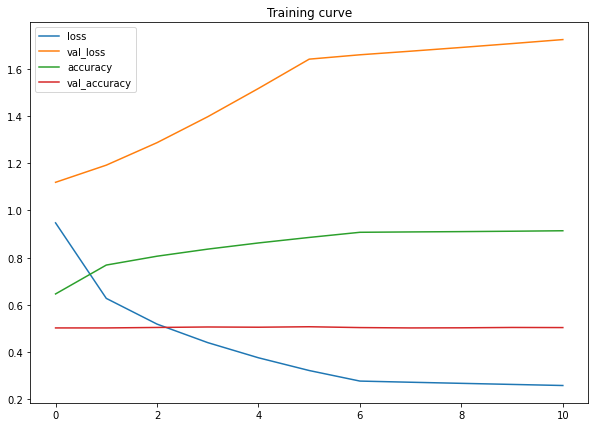

In [82]:
plt.figure(figsize=(10,7))
loss = history_model_2.history["loss"]
val_loss = history_model_2.history["val_loss"]
accuracy = history_model_2.history["accuracy"]
val_accuracy = history_model_2.history["val_accuracy"]
plt.plot(loss, label="loss")
plt.plot(val_loss, label="val_loss")
plt.plot(accuracy, label="accuracy")
plt.plot(val_accuracy, label="val_accuracy")
plt.legend()
plt.title("Training curve")

In [83]:
#Evaluate
model_2.evaluate(test_dataset)

63/63 [==============================] - 0s 7ms/step - loss: 1.0885 - accuracy: 0.5350


[1.088480830192566, 0.5350000262260437]

In [84]:
#Make predictions and get results
model_2_pred_probs = model_2.predict(test_dataset)
model_2_preds = tf.argmax(model_2_pred_probs, axis=1)
model_2_results = calculate_results(test_labels, model_2_preds)
model_2_results

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 22.3,
 'f1': 0.1833282045533476,
 'precision': 0.16384374509040986,
 'recall': 0.223}

### Model 3: Feature extraction with pretrained token embeddings

In [85]:
import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
                                        name="universal_sentence_encoder")

In [134]:
#Build the model 
inputs = layers.Input(shape=[], dtype=tf.string)
pretrained_embedding = tf_hub_embedding_layer(inputs)
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(pretrained_embedding)
x = layers.GRU(128)(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(5, activation="softmax")(x)
model_3 = tf.keras.Model(inputs, outputs)

In [135]:
#Compile the model 
model_3.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="Adam")

In [136]:
%%time
#Fit the model 
history_model_3 = model_3.fit(train_dataset, 
                              epochs=500, 
                              verbose=0,
                              validation_data=val_dataset,
                              callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5, verbose=0),
                                         tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)])

CPU times: user 3min 16s, sys: 17.2 s, total: 3min 34s
Wall time: 2min 50s


Text(0.5, 1.0, 'Training curve')

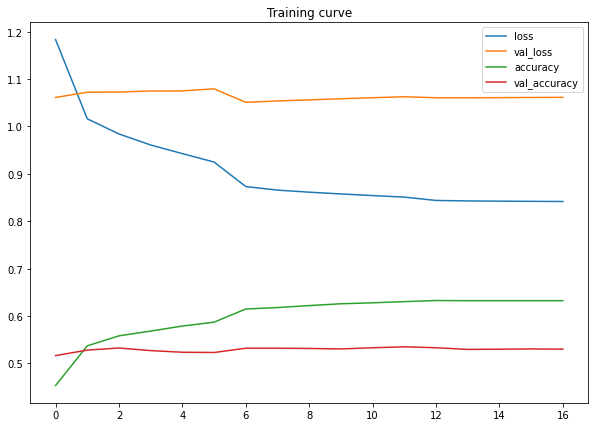

In [137]:
plt.figure(figsize=(10,7))
loss = history_model_3.history["loss"]
val_loss = history_model_3.history["val_loss"]
accuracy = history_model_3.history["accuracy"]
val_accuracy = history_model_3.history["val_accuracy"]
plt.plot(loss, label="loss")
plt.plot(val_loss, label="val_loss")
plt.plot(accuracy, label="accuracy")
plt.plot(val_accuracy, label="val_accuracy")
plt.legend()
plt.title("Training curve")

In [138]:
#Evaluate
model_3.evaluate(test_dataset)

63/63 [==============================] - 3s 41ms/step - loss: 1.0590 - accuracy: 0.5165


[1.0589864253997803, 0.5164999961853027]

In [139]:
#Make predictions and get results
model_3_pred_probs = model_3.predict(test_dataset)
model_3_preds = tf.argmax(model_3_pred_probs, axis=1)
model_3_results = calculate_results(test_labels, model_3_preds)
model_3_results

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 20.849999999999998,
 'f1': 0.17758291162797374,
 'precision': 0.16607902920296078,
 'recall': 0.2085}